## Step 1: Reading the data

In [1]:
#Import `pandas` and `matplotlib.pyplot`
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Load [train.csv](./train.csv) as a `pandas` DataFrame
df = pd.read_csv('./train.csv')

## Step 2: Cleaning the data

In [3]:
!pip install missingno

In [4]:
import missingno as msno

In [5]:
df.head()

In [ ]:
df.info()

In [ ]:
df.shape

In [8]:
df.describe().round(2)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00,891.00,891.00,714.00,891.00,891.00,891.00
mean,446.00,0.38,2.31,29.70,0.52,0.38,32.20
std,257.35,0.49,0.84,14.53,1.10,0.81,49.69
min,1.00,0.00,1.00,0.42,0.00,0.00,0.00
25%,223.50,0.00,2.00,20.12,0.00,0.00,7.91
50%,446.00,0.00,3.00,28.00,0.00,0.00,14.45
75%,668.50,1.00,3.00,38.00,1.00,0.00,31.00
max,891.00,1.00,3.00,80.00,8.00,6.00,512.33


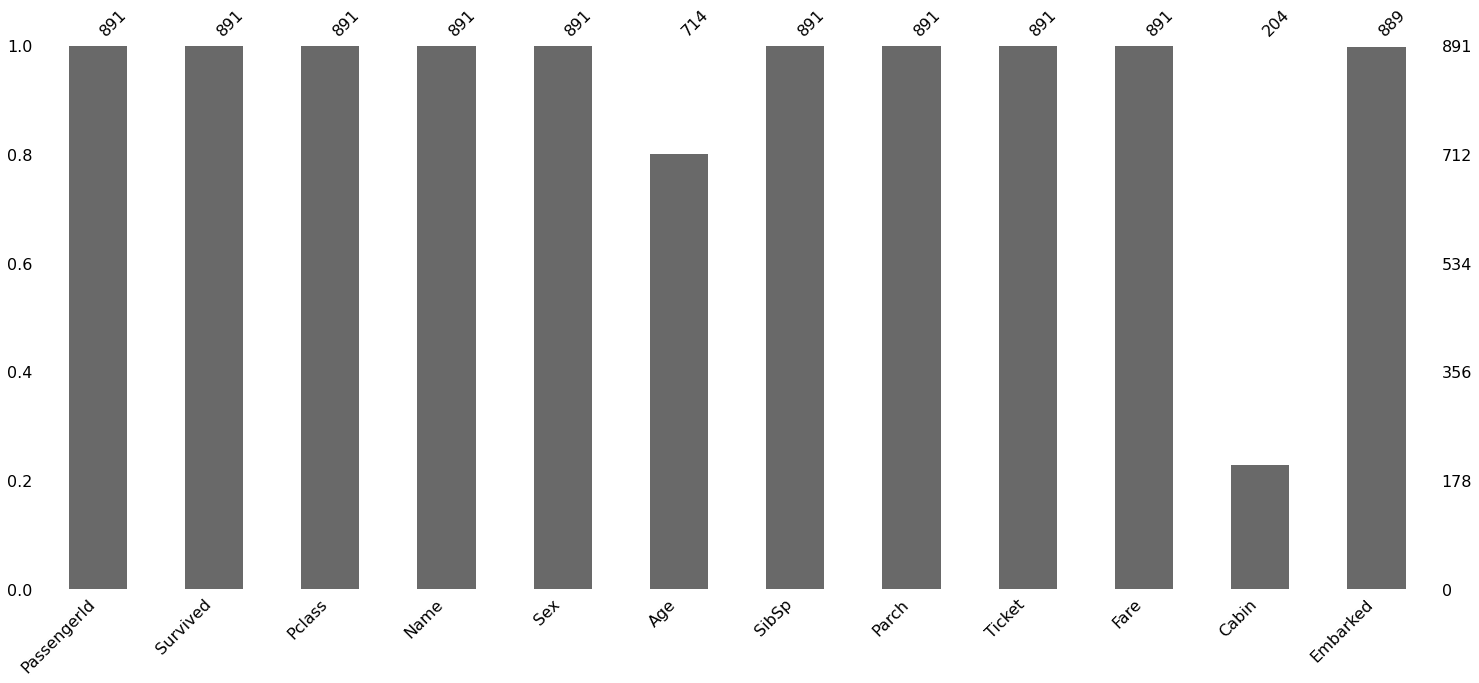

In [9]:
#1. Create a bar chart showing how many missing values are in each column
msno.bar(df);

In [10]:
#2. Which column has the most `NaN` values? How many cells in that column are empty?
# cabin, 687 cells are empty

In [11]:
#3. Delete all rows where `Embarked` is empty
df.dropna(subset=['Embarked'], inplace = True)

In [12]:
#4 Fill all empty cabins with **¯\\_(ツ)_/¯**
df['Cabin'] = df['Cabin'].fillna(value='**¯\\_(ツ)_/¯**')

# Step 3: Feature extraction

In [13]:
#1.  There are two columns that pertain to how many family members are on the boat for a given person. Create a new column called 
#`FamilyCount` which will be the sum of those two columns
df['FamilyCount'] = df['SibSp']+df['Parch']

In [14]:
#2. Reverends have a special title in their name. Create a column called `IsReverend`: 1 if they're a preacher, 0 if they're not.
#df['IsReverend'] = 0
df['IsReverend']=df['Name'].apply(lambda names: 1 if 'Master.' in names else 0)

In [15]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,**¯\_(ツ)_/¯**,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,**¯\_(ツ)_/¯**,S,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,**¯\_(ツ)_/¯**,S,0,0


In [16]:
df_dummies = pd.get_dummies(df, columns=['Embarked'])
df_dummies = pd.get_dummies(df, columns=['Sex'])

In [17]:
df_dummies.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,**¯\_(ツ)_/¯**,S,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,1,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,**¯\_(ツ)_/¯**,S,0,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,1,0,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,**¯\_(ツ)_/¯**,S,0,0,0,1


# Step 4: Exploratory analysis

In [18]:
#1. What was the survival rate overall?  ANS: 38.2%
df.groupby(['Survived'])['Survived'].agg(['count'])/df['Name'].count()*100

,count
Survived,
0,61.754781
1,38.245219


In [19]:
#2. Which gender fared the worst? What was their survival rate? 
#ANS: Maled fared the worst with survival rate only 18.9% while female survival rate is 74%  
df2 = df.groupby(['Sex', 'Survived']).agg({'Name': 'count'})
print(df2)
df3 = df2.groupby(level=0).apply(lambda x:100 * x / float(x.sum())) 
df3


                 Name
Sex    Survived      
female 0           81
       1          231
male   0          468
       1          109


Name
Sex    Survived           
female 0         25.961538
       1         74.038462
male   0         81.109185
       1         18.890815

In [20]:
#3. What was the survival rate for each `Pclass`?
#ANS: Survial rate for Pclass 1 is 62%
#ANS: Survial rate for Pclass 2 is 47%
#ANS: Survial rate for Pclass 3 is 24%
df2 = df.groupby(['Pclass', 'Survived']).agg({'Name': 'count'}) 
print(df2)
df3 = df2.groupby(level=0).apply(lambda x:100 * x / float(x.sum())) 
df3

                 Name
Pclass Survived      
1      0           80
       1          134
2      0           97
       1           87
3      0          372
       1          119


Name
Pclass Survived           
1      0         37.383178
       1         62.616822
2      0         52.717391
       1         47.282609
3      0         75.763747
       1         24.236253

In [21]:
#4. Did any reverends survive? How many? #Yes, 23 reverend survived
df.groupby(['IsReverend','Survived'])['Name'].agg(['count'])

count
IsReverend Survived       
0          0           532
           1           317
1          0            17
           1            23

In [22]:
#5. What is the survival rate for cabins marked **¯\\_(ツ)_/¯**  ANS: the survival rate for cabins marked **¯\\_(ツ)_/¯** is 29.9%
df2 = df.groupby(['Cabin', 'Survived']).agg({'Name': 'count'}) 
df3 = df2.groupby(level=0).apply(lambda x:100 * x / float(x.sum())) 
df3

Name
Cabin         Survived            
**¯\_(ツ)_/¯** 0          70.014556
              1          29.985444
A10           0         100.000000
A14           0         100.000000
A16           1         100.000000
...                            ...
F38           0         100.000000
F4            1         100.000000
G6            0          50.000000
              1          50.000000
T             0         100.000000

[164 rows x 1 columns]

In [23]:
#6. What is the survival rate for people whose `Age` is empty? #ANS: 29.3%
df2 = df[df['Age'].isnull()]
df2 = df2.groupby(['Survived']).agg({'Name': 'count'})/df2['Name'].count()*100
df2


,Name
Survived,
0,70.621469
1,29.378531


In [24]:
#7. What is the survival rate for each port of embarkation?  #Survivial rate for Embarked C is 55.3%
#Survivial rate for Embarked Q is 38.9%
#Survivial rate for Embarked S is 33.7%
df2 = df.groupby(['Embarked', 'Survived']).agg({'Name': 'count'}) 
df3 = df2.groupby(level=0).apply(lambda x:100 * x / float(x.sum())) 
df3

Name
Embarked Survived           
C        0         44.642857
         1         55.357143
Q        0         61.038961
         1         38.961039
S        0         66.304348
         1         33.695652

In [25]:
#8. What is the survival rate for children (under 12) in each `Pclass`? 
# ANS Survial rate for children in Pclass 1 is 75 %
#Survial rate for children in Pclass 2 is 100 %
#Survial rate for children in Pclass 3 is 41.6 %
df2 = df[df['Age'].notnull()]
df2=df2.loc[df2['Age'] <= 12]
df2 = df2.groupby(['Pclass', 'Survived']).agg({'Name': 'count'}) 
df2 = df2.groupby(level=0).apply(lambda x:100 * x / float(x.sum())) 
df2

Name
Pclass Survived            
1      0          25.000000
       1          75.000000
2      1         100.000000
3      0          58.333333
       1          41.666667

In [26]:
#9. Did the captain of the ship survive? Is he on the list? ANS: No Capt. Edward Smith is not on the list
df2 = df[df['Name'].str.contains('Capt' or 'Edward' or 'Smith')]
print (df2)

     PassengerId  Survived  Pclass                          Name   Sex   Age  \
745          746         0       1  Crosby, Capt. Edward Gifford  male  70.0   

     SibSp  Parch     Ticket  Fare Cabin Embarked  FamilyCount  IsReverend  
745      1      1  WE/P 5735  71.0   B22        S            2           0  


In [27]:
#10. Of all the people that died, who had the most expensive ticket? How much did it cost? ANS:  Mr. Charles Alexander and  Mr. Mark, the tickets were $263
df_filter=df.loc[df['Survived'] == 0 ]
df_filter['Fare'].sort_values()

179      0.0000
277      0.0000
263      0.0000
597      0.0000
732      0.0000
         ...   
527    221.7792
557    227.5250
118    247.5208
438    263.0000
27     263.0000
Name: Fare, Length: 549, dtype: float64

In [28]:
df_filter=df_filter.loc[df_filter['Fare'] == 263]
df_filter

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0,C23 C25 C27,S,5,0
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0,C23 C25 C27,S,5,0


In [29]:
#11. Does having family on the boat help or hurt your chances of survival? 
#ANS In general, yes, the survival rate when having famiily member is  50% while the survival rate when not having famiily member is  30%.
#However, if the number of family onboard is more than 3, the survival rate drop dramatically. 
df_filter=df.loc[df['FamilyCount'] == 0]
df_filter.groupby(['Survived'])['Name'].agg(['count'])/df_filter['Name'].count()*100

,count
Survived,
0,69.906542
1,30.093458


In [30]:
df_filter=df.loc[df['FamilyCount'] > 0]
df_filter.groupby(['Survived'])['Name'].agg(['count'])/df_filter['Name'].count()*100

,count
Survived,
0,49.435028
1,50.564972


In [31]:
df2 = df.groupby(['FamilyCount', 'Survived']).agg({'Name': 'count'}) 
df2 = df2.groupby(level=0).apply(lambda x:100 * x / float(x.sum())) 
df2

Name
FamilyCount Survived            
0           0          69.906542
            1          30.093458
1           0          44.720497
            1          55.279503
2           0          42.156863
            1          57.843137
3           0          27.586207
            1          72.413793
4           0          80.000000
            1          20.000000
5           0          86.363636
            1          13.636364
6           0          66.666667
            1          33.333333
7           0         100.000000
10          0         100.000000

# Step 5: Plotting
Using Matplotlib and Seaborn, create several charts showing the survival rates of different groups of people. It's fine if a handful of charts are basic (Gender, Age, etc), but what we're really looking for is something beneath the surface.

In [32]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

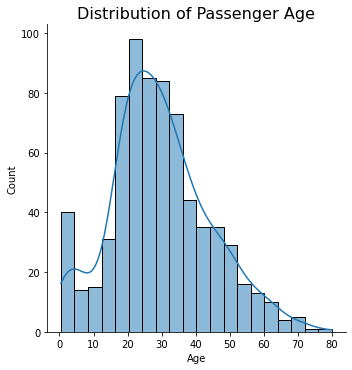

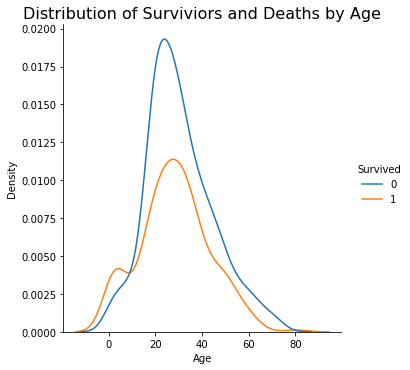

In [33]:
df2 = df[df['Age'].notnull()]

sns.displot(df2['Age'], kde = True)
plt.title("Distribution of Passenger Age" , fontsize=16)
plt.show()


sns.displot(x='Age', 
            hue='Survived', kind="kde", data=df2)
plt.title("Distribution of Surviviors and Deaths by Age" , fontsize=16)
plt.show()

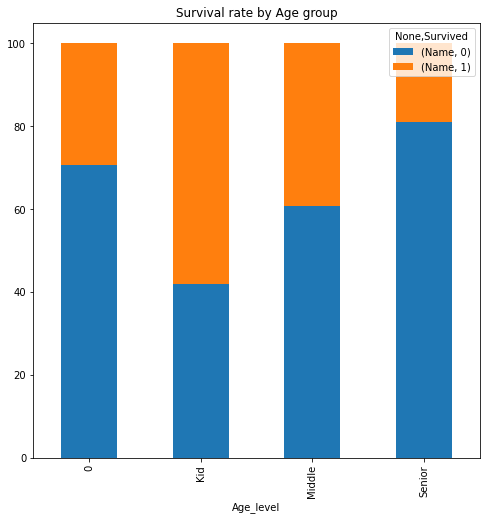

In [34]:
Age_level_condition = [
    (df['Age'] <= 12),
    (df['Age'] > 12) & (df['Age'] <= 60),
    (df['Age'] > 60)]


value = ['Kid','Middle', 'Senior']
df['Age_level'] = np.select(Age_level_condition,value) 


df2 = df.groupby(['Age_level', 'Survived']).agg({'Name': 'count'})
df3 = df2.groupby(level=0).apply(lambda x:100 * x / float(x.sum())) 
df3.unstack().plot(kind='bar',stacked=True,figsize=(8,8))
plt.title('Survival rate by Age group')
plt.show()

In [35]:
# Kids (people younger than 12) had the highest suivival rate 

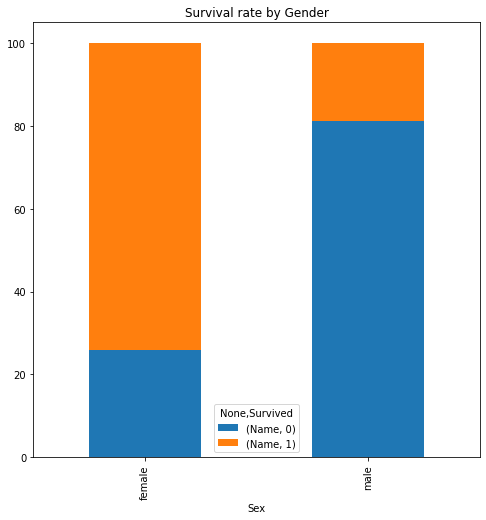

In [37]:
df2 = df.groupby(['Sex', 'Survived']).agg({'Name': 'count'})
df3 = df2.groupby(level=0).apply(lambda x:100 * x / float(x.sum())) 
df3.unstack().plot(kind='bar',stacked=True,figsize=(8,8))
plt.title('Survival rate by Gender')
plt.show()

In [ ]:
# Female had the higher suivival rate than male

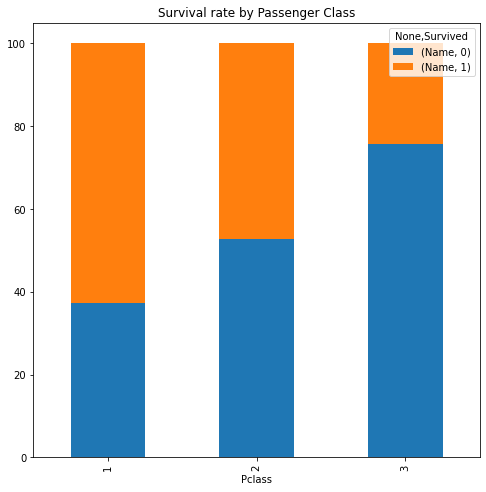

In [38]:
df2 = df.groupby(['Pclass', 'Survived']).agg({'Name': 'count'})
df3 = df2.groupby(level=0).apply(lambda x:100 * x / float(x.sum())) 
df3.unstack().plot(kind='bar',stacked=True,figsize=(8,8))
plt.title('Survival rate by Passenger Class')
plt.show()

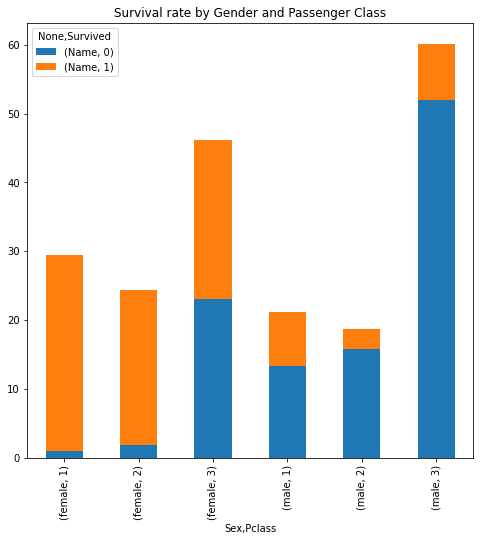

In [39]:
df2 = df.groupby(['Sex','Pclass', 'Survived']).agg({'Name': 'count'})
df3 = df2.groupby(level=0).apply(lambda x:100 * x / float(x.sum())) 
df3.unstack().plot(kind='bar',stacked=True,figsize=(8,8))
plt.title('Survival rate by Gender and Passenger Class')
plt.show()

In [40]:
#most females in passenger class 1 survived while most males in passenger class 3 did not survive.

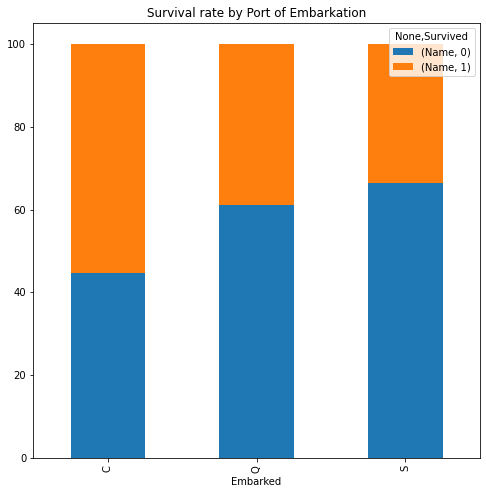

In [41]:
df2 = df.groupby(['Embarked', 'Survived']).agg({'Name': 'count'})
df3 = df2.groupby(level=0).apply(lambda x:100 * x / float(x.sum())) 
df3.unstack().plot(kind='bar',stacked=True,figsize=(8,8))
plt.title('Survival rate by Port of Embarkation')
plt.show()

In [42]:
#Passenger who embarked the ships from port C has more survival rate. 

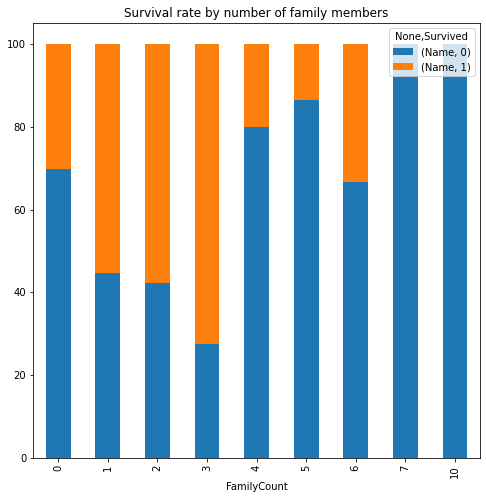

In [44]:
df2 = df.groupby(['FamilyCount', 'Survived']).agg({'Name': 'count'}) 
df3 = df2.groupby(level=0).apply(lambda x:100 * x / float(x.sum())) 
df3.unstack().plot(kind='bar',stacked=True,figsize=(8,8))
plt.title('Survival rate by number of family members')
plt.show()

In [45]:
#In general, yes, the survival rate when having famiily member is  50% while the survival rate when not having famiily member is  30%.
#However, if the number of family onboard is more than 3, the survival rate drop dramatically.